<a href="https://colab.research.google.com/github/refercon/ipynb/blob/main/Paper_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset initializaion

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
# !pip install deap
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
drive.mount('/content/drive')

dataset = 1
# Load the dataset
#论文在能力发现后写个局限性章节，因此才需要多次检验

if 1 == dataset:
  file_path = '/content/drive/MyDrive/paper-4/T-Drive.csv'#T-Drive
  GT_FILE = '/content/drive/MyDrive/data/AQ_GTD2.csv'
  UN_FILE = '/content/drive/MyDrive/data/AQ_unkown.csv'
elif 2 == dataset:
  file_path = '/content/drive/MyDrive/paper-4/San-Francis.csv'#This dataset contains mobility traces of taxi cabs in San Francisco,
  GT_FILE = '/content/drive/MyDrive/data/AEP_GTD.csv'
  UN_FILE = '/content/drive/MyDrive/data/AEP_unkown.csv'

data = pd.read_csv(file_path, header=None, names=['worker_id', 'latitude', 'longitude'])
# Randomly select 900 data points
grid_size = 30
selected_data = data.sample(n=grid_size * grid_size, random_state=0)
# Function to normalize the coordinates to fit a 30x30 grid
def normalize_coordinates(lat, lon, grid_size):
    min_lat, max_lat = lat.min(), lat.max()
    min_lon, max_lon = lon.min(), lon.max()
    # Normalize latitude and longitude to a scale of 0 to grid_size-1
    norm_lat = ((lat - min_lat) / (max_lat - min_lat) * (grid_size - 1)).astype(int)
    norm_lon = ((lon - min_lon) / (max_lon - min_lon) * (grid_size - 1)).astype(int)
    return norm_lat, norm_lon
# Function to map workers to the grid with their identifiers
def map_workers_to_grid_with_identifier(workers, grid_size):
    # Normalize the coordinates
    norm_lat, norm_lon = normalize_coordinates(workers['latitude'], workers['longitude'], grid_size)
    # Initialize the grid with empty strings
    grid_map = np.full((grid_size, grid_size), '', dtype=object)

    # Place each worker in the grid with identifier "w" followed by the index
    for index, (lat, lon) in enumerate(zip(norm_lat, norm_lon)):
        worker_id = f'w{index+1}'  # Adding 1 to start the index from 1

        # Find the next available spot if the current one is taken
        while grid_map[lat, lon] != '':
            lon = (lon + 1) % grid_size
            if lon == 0:
                lat = (lat + 1) % grid_size
        # Place the worker identifier in the grid
        grid_map[lat, lon] = worker_id

    return grid_map

# Map the selected 900 workers to the grid with identifiers

worker_grid_map_with_id = map_workers_to_grid_with_identifier(selected_data, grid_size)
df_grid_map_with_id = pd.DataFrame(worker_grid_map_with_id)
df_grid_map_with_id

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,w25,w30,w59,w78,w85,w93,w119,w126,w160,w179,...,w510,w536,w560,w578,w586,w611,w627,w698,w700,w727
1,w138,w407,w587,w738,w739,w741,w775,w783,w675,w285,...,w817,w831,w842,w859,w874,w701,w893,w894,w895,w896
2,w193,w200,w482,w897,w898,w899,w900,w396,w41,w149,...,w14,w24,w67,w68,w79,w86,w17,w95,w105,w116
3,w122,w135,w137,w141,w152,w158,w166,w140,w195,w196,...,w50,w136,w90,w189,w99,w1,w132,w143,w202,w296
4,w263,w40,w304,w309,w361,w367,w371,w375,w381,w383,...,w425,w435,w439,w338,w45,w72,w108,w65,w161,w214
5,w269,w278,w281,w203,w260,w282,w171,w295,w300,w319,...,w459,w463,w265,w465,w314,w8,w46,w75,w96,w111
6,w128,w144,w164,w199,w43,w204,w208,w233,w236,w241,...,w348,w350,w354,w62,w366,w112,w3,w21,w23,w34
7,w38,w63,w64,w84,w98,w110,w120,w129,w153,w182,...,w139,w302,w306,w315,w316,w10,w58,w69,w7,w66
8,w71,w76,w92,w115,w147,w168,w186,w206,w210,w213,...,w324,w325,w327,w328,w332,w4,w5,w39,w87,w181
9,w198,w234,w275,w343,w356,w363,w368,w372,w376,w378,...,w127,w89,w133,w231,w326,w31,w16,w107,w156,w176


# Grid initialization

In [ ]:
import random
import numpy as np
import pandas as pd
if 1 == dataset:
  random.seed(6)
else:
  random.seed(45)
# Select 100 random worker positions in the grid
workers_num = 100
d = 15
worker_positions = random.sample(list(zip(*np.where(df_grid_map_with_id.apply(lambda x: x.str.startswith('w'))))), workers_num)

# Create a set of task identifiers (t1, t2, ..., t100)
tasks = [f't{i+1}' for i in range(workers_num)]

# Initialize a new grid with empty strings
new_grid_map = np.full((grid_size, grid_size), '', dtype=object)

# Place workers 'w1' to 'w100' in their original positions
for worker_row, worker_col in worker_positions:
    new_grid_map[worker_row, worker_col] = df_grid_map_with_id.iloc[worker_row, worker_col]

# Define adjacent directions
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
tasks_placed = 0
# Place tasks adjacent to workers 'w1' to 'w100'
for i, task in enumerate(tasks):
    # print(tasks_placed)
    worker_row, worker_col = worker_positions[i]
    adjacent_cells = [(worker_row + dr, worker_col + dc) for dr, dc in directions]

    for row, col in adjacent_cells:
        if (0 <= row < grid_size) and (0 <= col < grid_size) and new_grid_map[row, col] == '':
            new_grid_map[row, col] = task
            tasks_placed += 1
            break

# Convert the new grid map to a DataFrame for visualization
df_new_grid_map = pd.DataFrame(new_grid_map)

df_new_grid_map
# 找到所有任务的位置

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,,,t39,,,,t20,,,,...,,w536,w560,,,,,,t38,w727
1,,t70,w587,t96,,,w775,,t22,,...,,t50,t8,t5,,,,,w895,t99
2,,w200,,w897,,,t47,,w41,,...,,,,w68,,,,t12,w105,
3,t15,w135,,,,,w166,,,,...,,,,,,,t36,w143,t93,
4,w263,t49,,,,,,t27,,t75,...,,,,,,,w108,,,
5,,,,,,,,w295,,w319,...,,,,,,,w46,,,
6,,,,,t73,,t28,,,,...,,,,,,,t40,,,
7,,,,,w98,,w120,,,,...,t67,,,t4,,,,,,
8,,,,,,,,,t1,,...,w324,,,w328,,,,,,
9,t84,,,,,,,,w376,,...,w127,,,,t53,,,t46,t41,


# Data conversion

In [ ]:
# Extracting worker and task information in the specified format
def extract_entities(grid_map):
    tasks = []
    workers = []
    for row_idx, row in enumerate(grid_map):
        for col_idx, cell in enumerate(row):
            if cell.startswith('w'):  # It's a worker
                worker_id = cell[1:]  # Remove the 'w' to get the numeric ID
                workers.append({"id": 'w' + worker_id, "location": (row_idx+1, col_idx+1)})
            elif cell.startswith('t'):  # It's a task
                task_id = cell[1:]  # Remove the 't' and convert to int
                tasks.append({"id": 't' + task_id, "location": (row_idx+1, col_idx+1)})

    return tasks, workers

tasks, workers = extract_entities(df_new_grid_map.to_numpy())

# Convert workers list to a dictionary
workers = {worker["id"]: worker["location"] for worker in workers}
# Convert tasks list to a dictionary
tasks = {task["id"]: task["location"] for task in tasks}

# first_two_workers = list(workers.items())[:2]
# # 将结果转换回字典格式
# workers = dict(list(workers.items())[:2])
len(workers),len(tasks)

(100, 100)

# PriRadar task assignment

In [ ]:
import time
start_time = time.time()
# 计算两个位置之间的曼哈顿距离
def manhattan_distance(loc1, loc2):
    # return max(abs(loc1[0] - loc2[0]), abs(loc1[1] - loc2[1]))
    return abs(loc1[0] - loc2[0]) + abs(loc1[1] - loc2[1])
def chebyshev_distance(loc1, loc2):
    # 计算切比雪夫距离
    return max(abs(loc1[0] - loc2[0]), abs(loc1[1] - loc2[1]))

# 简单哈希函数
def simple_hash(location):
    return hash(location)
# 计算任务邻居网格
def get_neighbors(location, distance):
    x, y = location
    neighbors = [(x+i, y+j) for i in range(-distance, distance+1) for j in range(-distance, distance+1)
                 if 0 <= x+i < grid_size and 0 <= y+j < grid_size]
    return [simple_hash((x+i, y+j)) for i, j in neighbors]

# 匹配工人和任务 - 根据工人和任务的哈希值进行匹配，并计算曼哈顿距离
def match_workers_to_tasks(distance):
    matched_tasks = {}
    total_distance = 0  # 用于累加所有匹配的曼哈顿距离
    total_distance2 = 0 # 用于累加所有匹配的切比雪夫距离
    matched_workers = set()  # 用于记录已经被匹配的工人

    for task, task_loc in tasks.items():
        task_neighbors_hashes = get_neighbors(task_loc, distance)
        for worker, worker_loc in workers.items():
            # 检查工人是否已被匹配
            if worker not in matched_workers and simple_hash(worker_loc) in task_neighbors_hashes:
                dist = manhattan_distance(task_loc, worker_loc)
                dist2 = chebyshev_distance(task_loc, worker_loc)
                matched_tasks[task] = (worker, dist,dist2)
                total_distance += dist  # 累加距离
                total_distance2 += dist2
                matched_workers.add(worker)  # 标记工人为已匹配
                break
    return matched_tasks, total_distance, total_distance2
matched_tasks, total_distance, total_distance2 = match_workers_to_tasks(d)
print("Total tasks:", len(matched_tasks))
print("Total Manhattan distance using priradar algorithm:", total_distance)
print("Total Chebyshev distance using priradar algorithm:", total_distance2)
end_time = time.time()
execution_time_ms = (end_time - start_time) * 1000
print(f"Execution time: {execution_time_ms} milliseconds")

Total tasks: 54
Total Manhattan distance using priradar algorithm: 490
Total Chebyshev distance using priradar algorithm: 398
Execution time: 175.70781707763672 milliseconds


#kNN assignment

In [ ]:
import time
# 记录开始时间
start_time = time.time()
# 计算两个位置之间的曼哈顿距离
def manhattan_distance(loc1, loc2):
    # return max(abs(loc1[0] - loc2[0]), abs(loc1[1] - loc2[1]))
    return abs(loc1[0] - loc2[0]) + abs(loc1[1] - loc2[1])
def chebyshev_distance(loc1, loc2):
    # 计算切比雪夫距离
    return max(abs(loc1[0] - loc2[0]), abs(loc1[1] - loc2[1]))
# kNN 匹配 - 为每个任务找到最近的工人
def kNN_match_tasks_to_workers(initial_k, max_distance):
    matched_tasks = {}
    total_distance = 0
    total_distance2 = 0
    available_workers = set(workers.keys())  # 可用工人集合

    for task, task_loc in tasks.items():
        k = initial_k
        search_distance = 1  # 初始搜索距离

        while search_distance <= max_distance:
            # 生成距离任务位置 search_distance 范围内的所有工人列表
            potential_workers = [(w, manhattan_distance(task_loc, workers[w])) for w in available_workers if manhattan_distance(task_loc, workers[w]) <= search_distance]
            potential_workers.sort(key=lambda x: x[1])  # 按距离排序

            # 选择最近的工人
            found_workers = [w for w, dist in potential_workers if w not in matched_tasks.values()]

            # 检查是否有足够的工人
            if len(found_workers) >= k:
                chosen_worker = found_workers[0]
                chosen_worker_distance = manhattan_distance(task_loc, workers[chosen_worker])

                dist2 = chebyshev_distance(task_loc, workers[chosen_worker])

                matched_tasks[task] = (chosen_worker, chosen_worker_distance)
                total_distance += chosen_worker_distance
                total_distance2 += dist2
                available_workers.remove(chosen_worker)
                break

            # 增加搜索范围
            search_distance *= 2

    return matched_tasks, total_distance,total_distance2

# 测试 kNN 匹配函数 - 初始 k 设置为 1，最大搜索距离设置为 5
matched_tasks, total_distance,total_distance2 = kNN_match_tasks_to_workers(1, d)
print("Total tasks:", len(matched_tasks))
print("Total Manhattan distance using kNN algorithm:", total_distance)
print("Total Chebyshev distance using kNN algorithm:", total_distance2)
# matched_tasks
# 计算并打印执行时间
end_time = time.time()
execution_time_ms = (end_time - start_time) * 1000
print(f"Execution time: {execution_time_ms} seconds")

Total tasks: 100
Total Manhattan distance using kNN algorithm: 102
Total Chebyshev distance using kNN algorithm: 101
Execution time: 19.78468894958496 seconds


#Greedy algorithm assignment

In [ ]:
import time
# 记录开始时间
start_time = time.time()
# 计算两个位置之间的曼哈顿距离
def manhattan_distance(loc1, loc2):
    # return max(abs(loc1[0] - loc2[0]), abs(loc1[1] - loc2[1]))
    return abs(loc1[0] - loc2[0]) + abs(loc1[1] - loc2[1])
def chebyshev_distance(loc1, loc2):
    # 计算切比雪夫距离
    return max(abs(loc1[0] - loc2[0]), abs(loc1[1] - loc2[1]))

# 贪心算法分配任务
def greedy_match_tasks_to_workers():
    matched_tasks = {}
    total_distance = 0
    available_workers = set(workers.keys())  # 可用工人集合

    # 创建所有可能的工人-任务对，并按照曼哈顿距离排序
    all_pairs = [(task, worker, manhattan_distance(task_loc, workers[worker])) for task, task_loc in tasks.items() for worker in available_workers]

    all_pairs.sort(key=lambda x: x[2])
    # 按距离顺序分配工人到任务
    for task, worker, dist in all_pairs:
        if task not in matched_tasks and worker in available_workers:
            matched_tasks[task] = (worker, dist)
            total_distance += dist
            available_workers.remove(worker)

    return matched_tasks, total_distance

# 测试贪心算法分配函数
matched_tasks, total_distance = greedy_match_tasks_to_workers()
print("Total tasks:", len(matched_tasks))
print("Total Manhattan distance using Greedy algorithm:", total_distance)
end_time = time.time()
# 计算并打印执行时间
execution_time_ms = (end_time - start_time) * 1000
print(f"Execution time: {execution_time_ms} seconds")

Total tasks: 100
Total Manhattan distance using Greedy algorithm: 102
Execution time: 33.513545989990234 seconds


#Our scheme assignment

In [ ]:
# import numpy as np
# #encrypt the locations of  tasks and workers
# from scipy.optimize import linear_sum_assignment

# np.set_printoptions(linewidth=100)
# start_time = time.time()
# def random_orthogonal_matrix(size,filename='orthogonal_matrix1.npy'):
#     # random_matrix = np.random.rand(size, size)
#     # Q, R = np.linalg.qr(random_matrix)
#     if os.path.exists(filename):
#         # 直接从文件中加载矩阵
#         Q = np.load(filename)
#     else:
#         # 生成一个随机矩阵
#         random_matrix = np.random.rand(size, size)
#         # 使用QR分解得到正交矩阵Q
#         Q, _ = np.linalg.qr(random_matrix)
#         # 将矩阵保存到文件中
#         np.save(filename, Q)
#     return Q

# def householder_matrix(v):
#     """Generate a Householder matrix given vector v."""
#     size = len(v)
#     identity = np.eye(size)
#     outer_product = np.outer(v, v)
#     return identity - 2 * outer_product / np.dot(v, v)

# def random_householder_matrix(size):
#     random_vector = np.random.rand(size)
#     unit_vector = random_vector / np.linalg.norm(random_vector)
#     return householder_matrix(unit_vector)

# def generate_location_matrix(k, alpha, p, q):
#     matrix = np.zeros((k, k))
#     for x in range(1, k+1):
#         for y in range(1, k+1):
#             matrix[x-1, y-1] = k**2 * alpha**(-abs(p-x) - abs(q-y))
#     return matrix

# def calculate_distance(matrix1, matrix2):
#     A_vec = matrix1.ravel()
#     B_vec = matrix2.ravel()
#     dot_product = np.dot(A_vec, B_vec)
#     norm_A = np.linalg.norm(A_vec)
#     norm_B = np.linalg.norm(B_vec)
#     return dot_product / (norm_A * norm_B)

# def is_location_exposed(matrix, true_position):
#     max_position = np.unravel_index(np.argmax(matrix), matrix.shape)
#     min_position = np.unravel_index(np.argmin(matrix), matrix.shape)
#     return true_position == max_position or true_position == min_position
# def rank_values(arr):
#     # 获取数组中唯一值的排序后版本
#     unique_values = np.unique(arr)

#     # 使用 searchsorted 方法查找原数组中每个元素在唯一值数组中的索引
#     # 这将为原数组中的每个元素分配一个基于其值的排名
#     ranked = np.searchsorted(unique_values, arr)

#     return ranked
# def generate_safe_matrices(Lt, t_position, Lws, w_positions):
#     # attempt = 1
#     # while True:
#         Rt = random_orthogonal_matrix(grid_size)
#         Lt_1 = Lt @ Rt
#         Rw = Rt
#         Lw_transformed = [Lw @ Rw for Lw in Lws]
#         # if not is_location_exposed(Lt_1, t_position) and not any(is_location_exposed(Lw, pos) for Lw, pos in zip(Lw_transformed, w_positions)):
#         return Lt_1, Lw_transformed
#         # else:
#         #     attempt += 1
# alpha = 2

# # 输入数据
# # workers = {'w91': (1, 2), 'w92': (2, 1), 'w96': (3, 4)}
# # tasks = {'t1': (1, 1), 't3': (3, 3), 't5': (5, 5)}

# # 构建代价矩阵
# cost_matrix = np.zeros((len(tasks), len(workers)))
# tasks_list = list(tasks.items())
# workers_list = list(workers.items())

# for i, (t_id, task_pos) in enumerate(tasks_list):
#     Lt = generate_location_matrix(grid_size, alpha, *task_pos)
#     for j, (w_id, worker_pos) in enumerate(workers_list):
#         Lw = generate_location_matrix(grid_size, alpha, *worker_pos)
#         Lt_1, [Lw_transformed] = generate_safe_matrices(Lt, (task_pos[0]-1, task_pos[1]-1), [Lw], [(worker_pos[0]-1, worker_pos[1]-1)])
#         similarity = calculate_distance(Lt_1, Lw_transformed)
#         cost_matrix[i, j] = (1 / similarity)  # 用1减去相似度得到成本

# cost_matrix2 = rank_values(cost_matrix)
# # 使用匈牙利算法
# row_ind, col_ind = linear_sum_assignment(cost_matrix2)

# # 计算总曼哈顿距离
# total_manhattan_distance = 0
# total_cost_distance = 0
# total_chebyshev_distance = 0
# for i, j in zip(row_ind, col_ind):
#     task_pos = tasks_list[i][1]

#     worker_pos = workers_list[j][1]

#     manhattan_distance = abs(task_pos[0] - worker_pos[0]) + abs(task_pos[1] - worker_pos[1])
#     # chebyshev_distance = max(abs(task_pos[0] - worker_pos[0]), abs(task_pos[1] - worker_pos[1]))
#     total_manhattan_distance += manhattan_distance
#     # total_chebyshev_distance += chebyshev_distance
#     total_cost_distance += cost_matrix2[i, j]
#     # print(f"任务 {tasks_list[i][0]} 分配给工人 {workers_list[j][0]}，曼哈顿距离: {manhattan_distance}，余弦距离: {cost_matrix[i, j]}，切比雪夫距离: {chebyshev_distance}")
# def manhattan_distance_matrix(tasks, workers):
#     distances = np.zeros((len(tasks), len(workers)))
#     for i, (_, task_pos) in enumerate(tasks):
#         for j, (_, worker_pos) in enumerate(workers):
#             distances[i, j] = abs(task_pos[0] - worker_pos[0]) + abs(task_pos[1] - worker_pos[1])

#     return distances

# end_time = time.time()
# print("总曼哈顿距离:", total_manhattan_distance,"切比雪夫距离:", total_chebyshev_distance)
# execution_time_ms = (end_time - start_time) * 1000
# print(f"Execution time: {execution_time_ms} milliseconds")

# manhattan_distances = manhattan_distance_matrix(tasks_list, workers_list)
# task_ids = [task[0] for task in tasks_list]
# worker_ids = [worker[0] for worker in workers_list]
# DM = pd.DataFrame(manhattan_distances, columns=task_ids, index=worker_ids)
# DM

# Our scheme assignment2

In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment
import time
import os
start_time = time.time()
def random_orthogonal_matrix(size, filename='orthogonal_matrix1.npy'):
    if os.path.exists(filename):
        Q = np.load(filename)
    else:
        random_matrix = np.random.rand(size, size)
        Q, _ = np.linalg.qr(random_matrix)
        np.save(filename, Q)
    return Q

def generate_location_matrix(k, alpha, p, q):
    matrix = np.zeros((k, k))
    for x in range(1, k+1):
        for y in range(1, k+1):
            matrix[x-1, y-1] = k**2 * alpha**(-abs(p-x) - abs(q-y))
    return matrix

def calculate_distance(matrix1, matrix2):
    A_vec = matrix1.ravel()
    B_vec = matrix2.ravel()
    dot_product = np.dot(A_vec, B_vec)
    norm_A = np.linalg.norm(A_vec)
    norm_B = np.linalg.norm(B_vec)
    return dot_product / (norm_A * norm_B)

def rank_values(arr):
    unique_values = np.unique(arr)
    ranked = np.searchsorted(unique_values, arr)
    return ranked

def generate_safe_matrices(Lt, Lws, orthogonal_matrix):
    Lt_1 = Lt @ orthogonal_matrix
    Lw_transformed = [Lw @ orthogonal_matrix for Lw in Lws]
    return Lt_1, Lw_transformed

alpha = 2
Rt = random_orthogonal_matrix(grid_size)
task_matrices = {t_id: generate_location_matrix(grid_size, alpha, *pos) for t_id, pos in tasks.items()}
worker_matrices = {w_id: generate_location_matrix(grid_size, alpha, *pos) for w_id, pos in workers.items()}

cost_matrix = np.zeros((len(tasks), len(workers)))
tasks_list = list(tasks.items())
workers_list = list(workers.items())

for i, (t_id, Lt) in enumerate(task_matrices.items()):
    Lws = list(worker_matrices.values())
    Lt_1, Lw_transformed = generate_safe_matrices(Lt, Lws, Rt)

    for j, Lw in enumerate(Lw_transformed):
        similarity = calculate_distance(Lt_1, Lw)
        cost_matrix[i, j] = (1 / similarity)

cost_matrix2 = rank_values(cost_matrix)
row_ind, col_ind = linear_sum_assignment(cost_matrix2)

# 计算总曼哈顿距离
total_manhattan_distance = 0
total_cost_distance = 0
total_chebyshev_distance = 0
for i, j in zip(row_ind, col_ind):
    task_pos = tasks_list[i][1]
    worker_pos = workers_list[j][1]
    manhattan_distance = abs(task_pos[0] - worker_pos[0]) + abs(task_pos[1] - worker_pos[1])
    # chebyshev_distance = max(abs(task_pos[0] - worker_pos[0]), abs(task_pos[1] - worker_pos[1]))
    total_manhattan_distance += manhattan_distance
    # total_chebyshev_distance += chebyshev_distance
    total_cost_distance += cost_matrix2[i, j]
    # print(f"任务 {tasks_list[i][0]} 分配给工人 {workers_list[j][0]}，曼哈顿距离: {manhattan_distance}，余弦距离: {cost_matrix[i, j]}，切比雪夫距离: {chebyshev_distance}")
def manhattan_distance_matrix(tasks, workers):
    distances = np.zeros((len(tasks), len(workers)))
    for i, (_, task_pos) in enumerate(tasks):
        for j, (_, worker_pos) in enumerate(workers):
            distances[i, j] = abs(task_pos[0] - worker_pos[0]) + abs(task_pos[1] - worker_pos[1])

    return distances

end_time = time.time()
print("总曼哈顿距离:", total_manhattan_distance)
execution_time_ms = (end_time - start_time) * 1000
print(f"Execution time: {execution_time_ms} milliseconds")

manhattan_distances = manhattan_distance_matrix(tasks_list, workers_list)
task_ids = [task[0] for task in tasks_list]
worker_ids = [worker[0] for worker in workers_list]
DM = pd.DataFrame(manhattan_distances, columns=task_ids, index=worker_ids)
DM

总曼哈顿距离: 100
Execution time: 1054.0838241577148 milliseconds


,t39,t20,t38,t70,t96,t22,t11,t9,t33,t78,...,t14,t64,t44,t89,t98,t29,t17,t100,t85,t24
w266,9.0,15.0,19.0,20.0,27.0,1.0,5.0,27.0,3.0,3.0,...,29.0,42.0,44.0,50.0,52.0,54.0,32.0,36.0,43.0,56.0
w477,5.0,11.0,15.0,16.0,23.0,5.0,1.0,23.0,7.0,5.0,...,29.0,38.0,40.0,46.0,48.0,50.0,30.0,32.0,39.0,52.0
w536,17.0,11.0,7.0,6.0,1.0,27.0,23.0,1.0,29.0,27.0,...,51.0,38.0,36.0,32.0,30.0,28.0,52.0,48.0,41.0,30.0
w560,11.0,17.0,21.0,22.0,29.0,1.0,5.0,27.0,1.0,3.0,...,29.0,42.0,44.0,50.0,52.0,54.0,32.0,36.0,43.0,56.0
w727,9.0,15.0,19.0,20.0,27.0,1.0,3.0,25.0,3.0,1.0,...,27.0,40.0,42.0,48.0,50.0,52.0,30.0,34.0,41.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
w861,44.0,38.0,34.0,33.0,28.0,52.0,48.0,26.0,52.0,50.0,...,24.0,11.0,9.0,5.0,3.0,1.0,25.0,21.0,14.0,3.0
w868,34.0,40.0,44.0,45.0,52.0,30.0,28.0,50.0,30.0,28.0,...,2.0,13.0,15.0,19.0,21.0,23.0,1.0,5.0,12.0,25.0
w872,30.0,36.0,40.0,41.0,48.0,34.0,30.0,46.0,34.0,32.0,...,6.0,9.0,11.0,15.0,17.0,19.0,5.0,1.0,8.0,21.0
w880,33.0,29.0,33.0,34.0,41.0,41.0,37.0,39.0,41.0,39.0,...,13.0,2.0,4.0,8.0,10.0,12.0,12.0,8.0,1.0,14.0


#Original assignment before protecting

In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment
import time
start_time = time.time()
# # 输入数据
# workers = {'w91': (1, 2), 'w92': (2, 1), 'w96': (3, 4)}
# tasks = {'t1': (1, 1), 't3': (3, 3), 't5': (5, 5)}

# 构建代价矩阵
cost_matrix = np.zeros((len(tasks), len(workers)))
tasks_list = list(tasks.items())
workers_list = list(workers.items())

for i, (t_id, task_pos) in enumerate(tasks_list):
    for j, (w_id, worker_pos) in enumerate(workers_list):
        manhattan_distance = abs(task_pos[0] - worker_pos[0]) + abs(task_pos[1] - worker_pos[1])
        cost_matrix[i, j] = manhattan_distance  # 将曼哈顿距离作为成本

# 使用匈牙利算法
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# 计算总曼哈顿距离
total_manhattan_distance = 0
total_chebyshev_distance = 0
for i, j in zip(row_ind, col_ind):
    task_pos = tasks_list[i][1]
    worker_pos = workers_list[j][1]
    manhattan_distance = cost_matrix[i, j]
    total_manhattan_distance += manhattan_distance
    chebyshev_distance = max(abs(task_pos[0] - worker_pos[0]), abs(task_pos[1] - worker_pos[1]))
    total_chebyshev_distance += chebyshev_distance
    # print(f"任务 {tasks_list[i][0]} 分配给工人 {workers_list[j][0]}，曼哈顿距离: {manhattan_distance},切比雪夫距离: {chebyshev_distance}")

print("总曼哈顿距离:", total_manhattan_distance,"切比雪夫距离:", total_chebyshev_distance)
end_time = time.time()
execution_time_ms = (end_time - start_time) * 1000
print(f"Execution time: {execution_time_ms} milliseconds")

总曼哈顿距离: 100.0 切比雪夫距离: 100
Execution time: 17.552852630615234 milliseconds


In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cosine

# 构建代价矩阵
cost_matrix = np.zeros((len(tasks), len(workers)))
tasks_list = list(tasks.items())
workers_list = list(workers.items())

def calculate_distance(matrix1, matrix2):
    A_vec = matrix1.ravel()
    B_vec = matrix2.ravel()
    dot_product = np.dot(A_vec, B_vec)
    norm_A = np.linalg.norm(A_vec)
    norm_B = np.linalg.norm(B_vec)
    return dot_product / (norm_A * norm_B)

for i, (t_id, task_pos) in enumerate(tasks_list):
    Lt = generate_location_matrix(grid_size, alpha, *task_pos)
    for j, (w_id, worker_pos) in enumerate(workers_list):
        Lw = generate_location_matrix(grid_size, alpha, *worker_pos)
        similarity = calculate_distance(Lt, Lw)
        cost_matrix[i, j] = 1 / similarity  # 计算余弦距离

# 使用匈牙利算法
row_ind, col_ind = linear_sum_assignment(cost_matrix)
total_cost_distance = 0
total_manhattan_distance = 0
total_chebyshev_distance = 0
# 输出匹配结果
for i, j in zip(row_ind, col_ind):
    task_pos = tasks_list[i][1]
    worker_pos = workers_list[j][1]
    total_cost_distance += cost_matrix[i, j]
    manhattan_distance = abs(task_pos[0] - worker_pos[0]) + abs(task_pos[1] - worker_pos[1])
    total_manhattan_distance += manhattan_distance
    chebyshev_distance = max(abs(task_pos[0] - worker_pos[0]), abs(task_pos[1] - worker_pos[1]))
    total_chebyshev_distance += chebyshev_distance

    # print(f"任务 {tasks_list[i][0]} 分配给工人 {workers_list[j][0]}，曼哈顿距离: {manhattan_distance}, 余弦距离: {cost_matrix[i, j]},切比雪夫距离: {chebyshev_distance}")
print("总曼哈顿距离:", total_manhattan_distance,"切比雪夫距离:", total_chebyshev_distance)

总曼哈顿距离: 100 切比雪夫距离: 100


# Our scheme sensitivity, specificity，accuracy，F1-score

In [ ]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
threshold = 0.2
def GD(column1,column2):
  # 10-0.2  10+0.2
  return (abs(column2 - threshold) <= column1) & (column1 <= (column2 + threshold)).astype(int)
def main():
  # 读取CSV文件
  df = pd.read_csv(UN_FILE).drop('ID',axis=1)
  # df = df.iloc[:].drop('Unnamed: 0',axis=1)
  # 转换为数值类型
  df = df.apply(pd.to_numeric, errors='coerce')
  data = pd.read_csv(GT_FILE).drop(columns=['ID'])
    # 遍历所有列并计算灵敏度、特异度、正确率和F1-score
  results = pd.DataFrame(columns=["Time", "Sensitivity", "Specificity", "Accuracy", "F1_score"])
  for column in df.columns:
      if column == 'Label':
          continue
      # 使用MV推理方法作为分类器
      df['predicted'] = GD(df[column],data[column])
      # 计算混淆矩阵
      cm = confusion_matrix(df['Label'], df['predicted'])
      # 计算灵敏度、特异度、正确率和F1-score
      sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
      specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
      accuracy = accuracy_score(df['Label'], df['predicted'])
      f1 = f1_score(df['Label'], df['predicted'])
      result = pd.DataFrame({"Time": f"column {column}", "Sensitivity": sensitivity,
                              "Specificity": specificity, "Accuracy": accuracy, "F1_score": f1}, index=[0])
      results = pd.concat([results, result], ignore_index=True)
      # print(f"Column: {column}",f"Sensitivity: {sensitivity:.2f}",f"Specificity: {specificity:.2f}",
      #       f"Accuracy: {accuracy:.2f}",f"F1-score: {f1:.2f}")
      # print("-"*100)
      # if False == os.path.isfile(f"/content/drive/MyDrive/data/MVI_score_{dataset}.csv"):
      #print(f"Creating the MVI_score_{dataset}.csv")
      results.to_csv(f"/content/drive/MyDrive/data/paper4/our_score_{dataset}.csv", index=False)

if True == os.path.exists(f"/content/drive/MyDrive/data/paper4/our_score_{dataset}.csv"):
  print(f"Creating Our_score_{dataset}.csv...")
  main()
pd.read_csv(f"/content/drive/MyDrive/data/paper4/our_score_{dataset}.csv")


Creating Our_score_2.csv...


,Time,Sensitivity,Specificity,Accuracy,F1_score
0,column L1_1,1.000,0.966667,0.98,0.975610
1,column L1_2,0.975,1.000000,0.99,0.987342
2,column L2_1,0.975,0.966667,0.97,0.962963
3,column L2_2,0.975,1.000000,0.99,0.987342
4,column L3_1,0.975,0.983333,0.98,0.975000
5,column L3_2,0.975,1.000000,0.99,0.987342
6,column L4_1,1.000,0.950000,0.97,0.963855
7,column L4_2,1.000,1.000000,1.00,1.000000
8,column L5_1,1.000,0.983333,0.99,0.987654
9,column L5_2,1.000,1.000000,1.00,1.000000


#Worker's data trust

In [ ]:

import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from collections import defaultdict
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import random,os
start_time = time.time()
# 加载 CSV 文件
data = pd.read_csv(GT_FILE).drop(columns=['ID']).iloc[:workers_num]
unidentified_data = pd.read_csv(UN_FILE).iloc[:workers_num]

labels = unidentified_data['Label'].values
WORKER_ID = DM.index#unidentified_data['ID'].values
unidentified_data = unidentified_data.drop(columns=['Label','ID'])

n_columns = data.shape[1]
n_columns_1 = unidentified_data.shape[1]
idx_list = []
init_trust = 1
n = 10
trust_data_a = []
reliable_threshold = 0.5
# 每两列进行异常检测
def time_decay(n,crruent_t):
  c = 0
  for i in range(1,n+1):
      c += i-1
  decay = (crruent_t - 1) / c
  return decay
for i in range(1, n_columns, 2):
    X = data.iloc[:, i:i + 1].values
    X_2 = unidentified_data.iloc[:, i:i + 1].values
    # 进行阈值检测
    is_inlier = ((X_2 >= X - threshold) & (X_2 <= X + threshold)).all(axis=1)
    trust_data = []
    L = int(i / 2) + 1
    trust_score = np.where(is_inlier == 1, init_trust, -1)
    trust_data = []
    L = int(i / 2) + 1
    score = 0
    # print(len(trust_score))
    for j in range(len(trust_score)):
        # data_trust_dict = {'W-' + str(WORKER_ID[j]):trust_score[j] * time_decay(n,L)}
        data_trust_dict = {str(WORKER_ID[j]):trust_score[j] * time_decay(n,L)}
        trust_data.append(data_trust_dict)
    trust_data_a.append(trust_data)

trust_list = []
grouped_data = {}
for sublist in trust_data_a:
  for item in sublist:
      trust_list.append(item)


grouped_dict = defaultdict(list)
for d in trust_list:
  for key, value in d.items():
      grouped_dict[key].append(value)
reliable_worker = []

for key,val in dict(grouped_dict).items():
  if sum(val) <= reliable_threshold:
      break
  reliable_worker_dict = {key:sum(val)}
  reliable_worker.append(reliable_worker_dict)


for key, value in grouped_dict.items():
  cumulative_sum = 0
  for i in range(len(value)):
    cumulative_sum += value[i]
    value[i] = cumulative_sum


df = pd.DataFrame.from_dict(grouped_dict, orient='index')

df.columns = ['K_' + str(col) for col in df.columns]
df.index.name = 'Workers'
df = df.reset_index()
# 计算并打印执行时间
end_time = time.time()
execution_time_ms = (end_time - start_time) * 1000
print(f"Execution time: {execution_time_ms} milliseconds")
df.T

Execution time: 39.766788482666016 milliseconds


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Workers,w266,w477,w536,w560,w727,w587,w775,w895,w200,w897,...,w813,w828,w830,w434,w369,w861,w868,w872,w880,w892
K_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
K_1,-0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,...,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222,-0.022222
K_2,-0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,...,-0.066667,-0.066667,-0.066667,-0.066667,-0.066667,-0.066667,-0.066667,-0.066667,-0.066667,-0.066667
K_3,0.0,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,...,-0.133333,-0.133333,-0.133333,-0.133333,-0.133333,-0.133333,-0.133333,-0.133333,-0.133333,-0.133333
K_4,0.088889,0.222222,0.222222,0.222222,0.222222,0.222222,0.222222,0.222222,0.222222,0.222222,...,-0.222222,-0.222222,-0.222222,-0.222222,-0.222222,-0.222222,-0.222222,-0.222222,-0.222222,-0.222222
K_5,0.2,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333
K_6,0.333333,0.466667,0.466667,0.466667,0.466667,0.466667,0.466667,0.466667,0.466667,0.466667,...,-0.466667,-0.466667,-0.466667,-0.466667,-0.466667,-0.466667,-0.466667,-0.466667,-0.466667,-0.466667
K_7,0.488889,0.622222,0.622222,0.622222,0.622222,0.622222,0.622222,0.622222,0.622222,0.622222,...,-0.622222,-0.622222,-0.622222,-0.622222,-0.622222,-0.622222,-0.622222,-0.622222,-0.622222,-0.622222
K_8,0.666667,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,...,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import OneClassSVM
from collections import defaultdict
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import random,os
start_time = time.time()
# 加载 CSV 文件
data = pd.read_csv(GT_FILE).drop(columns=['ID']).iloc[:workers_num]
unidentified_data = pd.read_csv(UN_FILE).iloc[:workers_num]

labels = unidentified_data['Label'].values
WORKER_ID = DM.index#unidentified_data['ID'].values
unidentified_data = unidentified_data.drop(columns=['Label','ID'])

n_columns = data.shape[1]
n_columns_1 = unidentified_data.shape[1]
idx_list = []
init_trust = 1
n = 10
trust_data_a = []
reliable_threshold = 0.5
# 每两列进行异常检测
def time_decay(n,crruent_t):
  c = 0
  for i in range(1,n+1):
      c += i-1
  decay = (crruent_t - 1) / c
  return decay
for i in range(1, n_columns, 2):
    X = data.iloc[:, i:i + 1].values
    X_2 = unidentified_data.iloc[:, i:i + 1].values
    # 进行阈值检测
    is_inlier = ((X_2 >= X - threshold) & (X_2 <= X + threshold)).all(axis=1)
    trust_data = []
    L = int(i / 2) + 1
    trust_score = np.where(is_inlier == 1, init_trust, -1)
    trust_data = []
    L = int(i / 2) + 1
    score = 0
    for j in range(len(trust_score)):
        # data_trust_dict = {'w' + str(WORKER_ID[j]):trust_score[j] * time_decay(n,L)}
        data_trust_dict = {str(WORKER_ID[j]):trust_score[j] * time_decay(n,L)}
        trust_data.append(data_trust_dict)
    trust_data_a.append(trust_data)
trust_list = []
grouped_data = {}
for sublist in trust_data_a:
  for item in sublist:
      trust_list.append(item)

grouped_dict = defaultdict(list)
for d in trust_list:
  for key, value in d.items():
      grouped_dict[key].append(value)
reliable_worker = []
for key,val in dict(grouped_dict).items():
  if sum(val) <= reliable_threshold:
      break
  reliable_worker_dict = {key:sum(val)}
  reliable_worker.append(reliable_worker_dict)

random.seed(42)
for dict_item in reliable_worker:
  for key in dict_item.keys():
      dict_item[key] = [dict_item[key]]  # 将原始值转换为列表
      for i in range(49):  # 添加49个新的值，再增加49个任务位置的质量计算
          dict_item[key].append(round(random.uniform(0.5, 1), 2))
df = pd.DataFrame({key: value for d in reliable_worker for key, value in d.items()})
Trust_result0 = df.T
# 计算并打印执行时间
end_time = time.time()
execution_time_ms = (end_time - start_time) * 1000
print(f"Execution time: {execution_time_ms} milliseconds")
Trust_result = Trust_result0.iloc[:, :workers_num]
Trust_result

Execution time: 37.89329528808594 milliseconds


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
w266,0.866667,0.82,0.51,0.64,0.61,0.87,0.84,0.95,0.54,0.71,...,0.79,0.85,0.52,0.61,0.64,0.54,0.62,0.55,0.64,0.82
w477,1.000000,0.68,0.69,0.60,0.63,0.97,0.82,0.80,0.59,0.86,...,0.55,0.52,0.55,0.81,0.90,0.71,0.53,0.69,1.00,0.76
w536,1.000000,0.99,0.93,0.51,0.86,0.84,0.77,0.63,0.82,0.56,...,0.88,0.88,0.56,0.74,0.77,0.63,0.94,0.71,0.61,0.77
w560,1.000000,0.86,0.60,0.66,1.00,0.82,0.72,0.76,0.56,0.61,...,0.93,0.62,0.60,0.72,0.71,0.64,0.62,0.96,0.72,0.93
w727,1.000000,0.78,0.53,1.00,0.92,0.98,0.96,0.92,0.58,0.74,...,0.56,0.95,0.62,0.80,0.81,0.71,0.79,0.76,0.97,0.60
w587,1.000000,0.86,0.62,0.70,0.84,0.65,0.66,0.88,0.54,0.73,...,0.74,0.95,0.92,0.55,0.71,0.64,0.50,0.89,0.82,0.63
w775,1.000000,0.87,0.78,0.71,0.50,0.54,0.94,0.95,0.77,0.92,...,0.55,0.94,0.93,0.61,0.91,0.73,0.65,0.90,0.61,0.51
w895,1.000000,0.60,0.66,0.93,0.98,0.64,0.82,0.70,0.99,0.77,...,0.65,0.70,0.70,0.65,0.56,0.71,0.97,0.84,0.95,0.81
w200,1.000000,0.65,0.77,0.50,0.64,0.71,0.79,0.83,0.73,0.72,...,0.71,0.59,0.98,0.76,0.53,0.62,0.92,0.73,0.90,0.83
w897,1.000000,0.99,0.80,0.98,0.95,0.81,0.86,0.75,0.92,0.77,...,0.69,0.50,0.68,0.88,0.93,0.98,0.71,0.87,0.77,0.80


In [ ]:
start_time = time.time()
# 选取 DM 根据 df.T.index 重新排序后的前50列
if workers_num >= 100:
  workers_num = 50
DM_result = DM.loc[df.T.index].iloc[:,:workers_num]
# 创建新的列名列表
new_column_names = [ str(i) for i in range(0, workers_num)]
# 分配新的列名给选取结果
DM_result.columns
DM_result.columns = new_column_names
# 定义 normalize 函数
def normalize(matrix):
    min_val = matrix.min()
    max_val = matrix.max()
    normalized_matrix = (matrix - min_val) / (max_val - min_val)
    return normalized_matrix
# 将 DM_result 转换为正向指标并标准化
# 转换方法：使用最大距离减去当前距离值
DM_result_positive = DM_result.max() - DM_result
# 标准化DM_result_positive
DM_normalized = normalize(DM_result_positive)
end_time = time.time()
# 计算并打印执行时间
execution_time_ms = (end_time - start_time) * 1000
print(f"Execution time: {execution_time_ms} milliseconds")
DM_normalized

Execution time: 10.443687438964844 milliseconds


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
w266,0.68,0.44,0.379310,0.366667,0.297297,1.000000,0.862069,0.257143,0.939394,0.935484,...,0.000000,0.62500,0.000000,0.000000,0.75000,0.68750,0.56250,0.000000,0.742857,0.68750
w477,0.84,0.60,0.517241,0.500000,0.405405,0.878788,1.000000,0.371429,0.818182,0.870968,...,0.114286,0.68750,0.142857,0.114286,0.68750,0.68750,0.68750,0.117647,0.628571,0.68750
w536,0.36,0.60,0.793103,0.833333,1.000000,0.212121,0.241379,1.000000,0.151515,0.161290,...,0.742857,0.00000,0.500000,0.742857,0.00000,0.00000,0.00000,0.705882,0.000000,0.00000
w560,0.60,0.36,0.310345,0.300000,0.243243,1.000000,0.862069,0.257143,1.000000,0.935484,...,0.000000,0.62500,0.000000,0.000000,0.75000,0.68750,0.56250,0.000000,0.800000,0.68750
w727,0.68,0.44,0.379310,0.366667,0.297297,1.000000,0.931034,0.314286,0.939394,1.000000,...,0.057143,0.68750,0.071429,0.057143,0.81250,0.75000,0.62500,0.058824,0.742857,0.75000
w587,0.88,0.64,0.551724,0.533333,0.432432,0.848485,0.965517,0.457143,0.787879,0.838710,...,0.200000,0.65625,0.250000,0.200000,0.65625,0.65625,0.65625,0.205882,0.600000,0.65625
w775,1.00,0.76,0.655172,0.633333,0.513514,0.757576,0.862069,0.542857,0.696970,0.741935,...,0.285714,0.56250,0.357143,0.285714,0.56250,0.56250,0.56250,0.294118,0.514286,0.56250
w895,0.88,0.88,0.758621,0.733333,0.594595,0.666667,0.758621,0.628571,0.606061,0.645161,...,0.371429,0.46875,0.464286,0.371429,0.46875,0.46875,0.46875,0.382353,0.428571,0.46875
w200,0.80,0.96,0.827586,0.800000,0.648649,0.606061,0.689655,0.685714,0.545455,0.580645,...,0.428571,0.40625,0.535714,0.428571,0.40625,0.40625,0.40625,0.441176,0.371429,0.40625
w897,0.76,1.00,0.862069,0.833333,0.675676,0.575758,0.655172,0.714286,0.515152,0.548387,...,0.457143,0.37500,0.571429,0.457143,0.37500,0.37500,0.37500,0.470588,0.342857,0.37500


#Caculating weights

In [ ]:
start_time = time.time()
# 重新定义计算信息熵的函数，以适应 pandas DataFrame 或 numpy 数组
def calculate_entropy_pandas(matrix):
    epsilon = np.finfo(float).eps  # 防止对0取对数
    # 若输入为 pandas DataFrame，先转换为 numpy 数组
    if isinstance(matrix, pd.DataFrame):
        matrix = matrix.values
    p_matrix = matrix / np.sum(matrix, axis=0, keepdims=True)
    entropy = -np.sum(p_matrix * np.log(p_matrix + epsilon), axis=0) / np.log(len(matrix))
    return entropy



entropy_Trust_pd = calculate_entropy_pandas(pd.DataFrame(Trust_result))
entropy_DM_pd = calculate_entropy_pandas(pd.DataFrame(DM_normalized))

# 重新计算整体熵权
entropy_combined_pd = np.array([np.mean(entropy_Trust_pd), np.mean(entropy_DM_pd)])
weight_combined_pd = (1 - entropy_combined_pd) / (1 - entropy_combined_pd).sum()

end_time = time.time()
# 计算并打印执行时间
execution_time_ms = (end_time - start_time) * 1000
print(f"Execution time: {execution_time_ms} milliseconds")
weight_combined_pd

Execution time: 1.1894702911376953 milliseconds


array([0.09341766, 0.90658234])

# Comprehensive weights

In [ ]:
start_time = time.time()
indexes = Trust_result.index
values = Trust_result.values * weight_combined_pd[0] + DM_normalized.values * weight_combined_pd[1]
result_df = pd.DataFrame(values, index=indexes)
end_time = time.time()
# 计算并打印执行时间
execution_time_ms = (end_time - start_time) * 1000
print(f"Execution time: {execution_time_ms} milliseconds")
result_df

Execution time: 3.280162811279297 milliseconds


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
w266,0.697438,0.475499,0.391519,0.392201,0.326509,0.987856,0.860007,0.321868,0.902083,0.914420,...,0.073800,0.646019,0.048577,0.056985,0.739724,0.673721,0.567872,0.051380,0.733248,0.699878
w477,0.854947,0.607473,0.533380,0.509342,0.426387,0.887309,0.983185,0.411465,0.796866,0.869943,...,0.154989,0.671853,0.180891,0.179278,0.707351,0.689602,0.672787,0.171115,0.663269,0.694273
w536,0.419787,0.636433,0.805892,0.803128,0.986922,0.270776,0.290762,0.965435,0.213963,0.198537,...,0.755669,0.082208,0.505605,0.742590,0.071932,0.058853,0.087813,0.706267,0.056985,0.071932
w560,0.637367,0.406709,0.337404,0.333630,0.313938,0.983185,0.848797,0.304119,0.958896,0.905078,...,0.086878,0.624533,0.056051,0.067261,0.746263,0.683063,0.567872,0.089681,0.792527,0.710154
w727,0.709894,0.471762,0.393387,0.425831,0.355469,0.998132,0.933740,0.370870,0.905820,0.975711,...,0.104119,0.712022,0.122675,0.126539,0.812266,0.746263,0.640414,0.124326,0.764076,0.735987
w587,0.891210,0.660552,0.558102,0.548903,0.470506,0.829943,0.936977,0.496645,0.764723,0.828554,...,0.250446,0.683691,0.312590,0.232696,0.661271,0.654732,0.641653,0.269791,0.620552,0.653798
w775,1.000000,0.770276,0.666834,0.640495,0.512251,0.737250,0.869349,0.580891,0.703792,0.758570,...,0.310403,0.597765,0.410658,0.316008,0.594963,0.578147,0.570674,0.350718,0.523227,0.557596
w895,0.891210,0.853843,0.749408,0.751705,0.630598,0.664176,0.764355,0.635244,0.641927,0.656823,...,0.397452,0.490353,0.486306,0.397452,0.477274,0.491287,0.515576,0.425105,0.477282,0.500629
w200,0.818684,0.931041,0.822207,0.771975,0.647841,0.615770,0.699029,0.699193,0.562694,0.593663,...,0.454862,0.423415,0.577218,0.459533,0.417810,0.426218,0.454243,0.468158,0.420806,0.445836
w897,0.782420,0.999066,0.856271,0.847035,0.701302,0.597640,0.674307,0.717622,0.552972,0.569090,...,0.478896,0.386677,0.581571,0.496645,0.426847,0.431518,0.406295,0.507900,0.382760,0.414703


#MEI sensitivity, specificity，accuracy，F1-score

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import os
def main():
  # 读取CSV文件
  df = pd.read_csv(UN_FILE).drop('ID',axis=1)
  # df = df.iloc[:].drop('Unnamed: 0',axis=1)
  # 转换为数值类型
  df = df.apply(pd.to_numeric, errors='coerce')
  # 计算每一列的均值
  mean_values = df.mean()
  # 设置阈值
  threshold = 2
  # 遍历所有列并计算灵敏度、特异度、正确率和F1-score
  # 创建一个空的 DataFrame 来存储所有的结果
  results = pd.DataFrame(columns=["Time", "Sensitivity", "Specificity", "Accuracy", "F1_score"])
  for column in df.columns:
      if column == 'Label':
          continue
      # 使用均值和阈值作为分类器
      df['predicted'] = df[column].apply(lambda x: 1 if mean_values[column] - threshold <= x <= mean_values[column] + threshold else 0)
      # 计算混淆矩阵
      cm = confusion_matrix(df['Label'], df['predicted'])
      # 计算灵敏度、特异度、正确率和F1-score
      sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
      specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
      accuracy = accuracy_score(df['Label'], df['predicted'])
      f1 = f1_score(df['Label'], df['predicted'])
      result = pd.DataFrame({"Time": f"column {column}", "Sensitivity": sensitivity,
                              "Specificity": specificity, "Accuracy": accuracy, "F1_score": f1}, index=[0])
      results = pd.concat([results, result], ignore_index=True)

      # print(f"Column: {column}",f"Sensitivity: {sensitivity:.2f}",f"Specificity: {specificity:.2f}"
      #       ,f"Accuracy: {accuracy:.2f}",f"F1-score: {f1:.2f}")
      # print("-"*100)
          # 将结果写入 CSV 文件
      results.to_csv(f"/content/drive/MyDrive/data/paper4/MEI_score_{dataset}.csv", index=False)
if True == os.path.exists(f"/content/drive/MyDrive/data/paper4/MEI_score_{dataset}.csv"):
  print(f"Creating MEI_score_{dataset}.csv...")
  main()
pd.read_csv(f"/content/drive/MyDrive/data/paper4/MEI_score_{dataset}.csv")

Creating MEI_score_2.csv...


,Time,Sensitivity,Specificity,Accuracy,F1_score
0,column L1_1,0.550,0.783333,0.69,0.586667
1,column L1_2,0.000,1.000000,0.60,0.000000
2,column L2_1,0.375,0.900000,0.69,0.491803
3,column L2_2,0.000,1.000000,0.60,0.000000
4,column L3_1,1.000,0.850000,0.91,0.898876
5,column L3_2,0.000,1.000000,0.60,0.000000
6,column L4_1,0.775,0.900000,0.85,0.805195
7,column L4_2,0.000,1.000000,0.60,0.000000
8,column L5_1,0.825,1.000000,0.93,0.904110
9,column L5_2,0.000,1.000000,0.60,0.000000


#MDI sensitivity, specificity，accuracy，F1-score

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import os
def main():
  # 读取CSV文件
  df = pd.read_csv(UN_FILE).drop('ID',axis=1)
  # df = df.iloc[:].drop('Unnamed: 0',axis=1)
  # 转换为数值类型
  df = df.apply(pd.to_numeric, errors='coerce')
  # 计算每一列的中位数
  median_values = df.median()
  # 设置阈值
  threshold = 2
  # 遍历所有列并计算灵敏度、特异度、正确率和F1-score
  # 创建一个空的 DataFrame 来存储所有的结果
  results = pd.DataFrame(columns=["Time", "Sensitivity", "Specificity", "Accuracy", "F1_score"])
  for column in df.columns:
      if column == 'Label':
          continue
      # 使用均值和阈值作为分类器
      df['predicted'] = df[column].apply(lambda x: 1 if median_values[column] - threshold <= x <= median_values[column] + threshold else 0)
      # 计算混淆矩阵
      cm = confusion_matrix(df['Label'], df['predicted'])
      # 计算灵敏度、特异度、正确率和F1-score
      sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
      specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
      accuracy = accuracy_score(df['Label'], df['predicted'])
      f1 = f1_score(df['Label'], df['predicted'])
      result = pd.DataFrame({"Time": f"column {column}", "Sensitivity": sensitivity,
                              "Specificity": specificity, "Accuracy": accuracy, "F1_score": f1}, index=[0])
      results = pd.concat([results, result], ignore_index=True)

      # print(f"Column: {column}",f"Sensitivity: {sensitivity:.2f}",f"Specificity: {specificity:.2f}"
      #       ,f"Accuracy: {accuracy:.2f}",f"F1-score: {f1:.2f}")
      # print("-"*100)
          # 将结果写入 CSV 文件
      results.to_csv(f"/content/drive/MyDrive/data/paper4/MDI_score_{dataset}.csv", index=False)
if True == os.path.exists(f"/content/drive/MyDrive/data/paper4/MDI_score_{dataset}.csv"):
  print(f"Creating MDI_score_{dataset}.csv...")
  main()
pd.read_csv(f"/content/drive/MyDrive/data/paper4/MDI_score_{dataset}.csv")

Creating MDI_score_2.csv...


,Time,Sensitivity,Specificity,Accuracy,F1_score
0,column L1_1,1.00,0.683333,0.81,0.808081
1,column L1_2,0.00,0.616667,0.37,0.000000
2,column L2_1,1.00,0.766667,0.86,0.851064
3,column L2_2,0.00,0.650000,0.39,0.000000
4,column L3_1,1.00,0.683333,0.81,0.808081
5,column L3_2,0.00,0.583333,0.35,0.000000
6,column L4_1,0.95,0.816667,0.87,0.853933
7,column L4_2,0.00,0.616667,0.37,0.000000
8,column L5_1,1.00,0.966667,0.98,0.975610
9,column L5_2,0.00,0.650000,0.39,0.000000


# MVI sensitivity, specificity，accuracy，F1-score

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
def MV(column):
  value_counts = column.value_counts()
  majority_value = value_counts.idxmax()
  return column.apply(lambda x: 1 if x == majority_value else 0)
def main():
  # 读取CSV文件
  df = pd.read_csv(UN_FILE).drop('ID',axis=1)
  # df = df.iloc[:].drop('Unnamed: 0',axis=1)
  # 转换为数值类型
  df = df.apply(pd.to_numeric, errors='coerce')
  # 遍历所有列并计算灵敏度、特异度、正确率和F1-score
  results = pd.DataFrame(columns=["Time", "Sensitivity", "Specificity", "Accuracy", "F1_score"])
  for column in df.columns:
      if column == 'Label':
          continue
      # 使用MV推理方法作为分类器
      df['predicted'] = MV(df[column])
      # 计算混淆矩阵
      cm = confusion_matrix(df['Label'], df['predicted'])
      # 计算灵敏度、特异度、正确率和F1-score
      sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
      specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
      accuracy = accuracy_score(df['Label'], df['predicted'])
      f1 = f1_score(df['Label'], df['predicted'])
      result = pd.DataFrame({"Time": f"column {column}", "Sensitivity": sensitivity,
                              "Specificity": specificity, "Accuracy": accuracy, "F1_score": f1}, index=[0])
      results = pd.concat([results, result], ignore_index=True)
      # print(f"Column: {column}",f"Sensitivity: {sensitivity:.2f}",f"Specificity: {specificity:.2f}",
      #       f"Accuracy: {accuracy:.2f}",f"F1-score: {f1:.2f}")
      # print("-"*100)
      # if False == os.path.isfile(f"/content/drive/MyDrive/data/MVI_score_{dataset}.csv"):
      #print(f"Creating the MVI_score_{dataset}.csv")
      results.to_csv(f"/content/drive/MyDrive/data/paper4/MVI_score_{dataset}.csv", index=False)
if True == os.path.exists(f"/content/drive/MyDrive/data/paper4/MVI_score_{dataset}.csv"):
  print(f"Creating MVI_score_{dataset}.csv...")
  main()
pd.read_csv(f"/content/drive/MyDrive/data/paper4/MVI_score_{dataset}.csv")

Creating MVI_score_2.csv...


,Time,Sensitivity,Specificity,Accuracy,F1_score
0,column L1_1,0.175,1.000000,0.67,0.297872
1,column L1_2,0.100,1.000000,0.64,0.181818
2,column L2_1,0.225,1.000000,0.69,0.367347
3,column L2_2,0.100,1.000000,0.64,0.181818
4,column L3_1,0.250,1.000000,0.70,0.400000
5,column L3_2,0.100,1.000000,0.64,0.181818
6,column L4_1,0.225,1.000000,0.69,0.367347
7,column L4_2,0.050,1.000000,0.62,0.095238
8,column L5_1,0.200,1.000000,0.68,0.333333
9,column L5_2,0.100,1.000000,0.64,0.181818


# WEI sensitivity, specificity，accuracy，F1-score

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
def WTI(column, threshold=1e-4):
  def calculate_weighted_mean(column, weights):
      return np.average(column, weights=weights)
  def calculate_weights(column, mean):
      distances = np.abs(column - mean)
      return np.square(1 / (distances + 1e-8))
  prev_mean = column.mean()
  while True:
      weights = calculate_weights(column, prev_mean)
      new_mean = calculate_weighted_mean(column, weights)
      if np.abs(new_mean - prev_mean) < threshold:
          break
      prev_mean = new_mean
  return column.apply(lambda x: 1 if x >= new_mean else 0)
def main():
  # 读取CSV文件
  df = pd.read_csv(UN_FILE).drop('ID',axis=1)
  # df = df.iloc[:].drop('Unnamed: 0',axis=1)
  # 转换为数值类型
  df = df.apply(pd.to_numeric, errors='coerce')
  results = pd.DataFrame(columns=["Time", "Sensitivity", "Specificity", "Accuracy", "F1_score"])
  # 遍历所有列并计算灵敏度、特异度、正确率和F1-score
  for column in df.columns:
      if column == 'Label':
          continue
      # 使用WTI推理方法作为分类器
      df['predicted'] = WTI(df[column])
      # 计算混淆矩阵
      cm = confusion_matrix(df['Label'], df['predicted'])
      # 计算灵敏度、特异度、正确率和F1-score
      sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
      specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
      accuracy = accuracy_score(df['Label'], df['predicted'])
      f1 = f1_score(df['Label'], df['predicted'])

      result = pd.DataFrame({"Time": f"column {column}", "Sensitivity": sensitivity,
                              "Specificity": specificity, "Accuracy": accuracy, "F1_score": f1}, index=[0])
      results = pd.concat([results, result], ignore_index=True)
      # print(f"Column: {column}",f"Sensitivity: {sensitivity:.2f}",f"Specificity: {specificity:.2f}",
      #       f"Accuracy: {accuracy:.2f}",f"F1-score: {f1:.2f}")
      # print("-"*100)
      # if False == os.path.isfile(f"/content/drive/MyDrive/data/MVI_score_{dataset}.csv"):
      #print(f"Creating the MVI_score_{dataset}.csv")
      results.to_csv(f"/content/drive/MyDrive/data/paper4/WEI_score_{dataset}.csv", index=False)
if True == os.path.exists(f"/content/drive/MyDrive/data/paper4/WEI_score_{dataset}.csv"):
  print(f"Creating WEI_score_{dataset}.csv...")
  main()
pd.read_csv(f"/content/drive/MyDrive/data/paper4/WEI_score_{dataset}.csv")

Creating WEI_score_2.csv...


,Time,Sensitivity,Specificity,Accuracy,F1_score
0,column L1_1,0.975,0.500000,0.69,0.715596
1,column L1_2,1.000,0.900000,0.94,0.930233
2,column L2_1,1.000,0.566667,0.74,0.754717
3,column L2_2,1.000,0.883333,0.93,0.919540
4,column L3_1,0.700,0.516667,0.59,0.577320
5,column L3_2,1.000,0.866667,0.92,0.909091
6,column L4_1,0.775,0.566667,0.65,0.639175
7,column L4_2,1.000,0.900000,0.94,0.930233
8,column L5_1,0.775,0.516667,0.62,0.620000
9,column L5_2,1.000,0.850000,0.91,0.898876


In [ ]:
import numpy as np
# 定义任务位置扰动矩阵
Rt = np.array([[1, 3, -5, 7],
         [0, 1, 2, 3],
        [-1, 0, 1, 2],
        [0, 0, 0, 1]])
#工人位置扰动矩阵
Rw = np.linalg.inv(Rt)
print("\n逆矩阵:")
print(Rw)


逆矩阵:
[[-0.1  0.3 -1.1  2. ]
 [ 0.2  0.4  0.2 -3. ]
 [-0.1  0.3 -0.1  0. ]
 [ 0.   0.   0.   1. ]]


In [ ]:
#任务1位置的矩阵，任务1位于第1行第1列
Lt1 = np.array([
  [17**6, 17**5, 17**4, 17**3],
  [17**5, 17**4, 17**3, 17**2],
  [17**4, 17**3, 17**2, 17**1],
  [17**3, 17**2, 17**1, 1]])
Lt_1 = Lt1 @ Rt #任务位置1的隐私矩阵
#工人1的位置矩阵,工人1位于第2行2列
Lw1 = np.array([
  [17**4, 17**5, 17**4, 17**3],
  [17**5, 17**6, 17**5, 17**4],
  [17**4, 17**5, 17**4, 17**3],
  [17**3, 17**4, 17**3, 17**2]])
#工人2的位置矩阵,工人1位于第4行2列
Lw2 = np.array([
  [17**2, 17**3, 17**2, 17**1],
  [17**3, 17**4, 17**3, 17**2],
  [17**4, 17**5, 17**4, 17**3],
  [17**5, 17**6, 17**5, 17**4]])
Lw1 = Rw @ Lw1.T  #工人1的位置隐私矩阵
Lw2 = Rw @ Lw2.T  #工人2的位置隐私矩阵
print('D11:',np.trace(Lt_1 @ Lw1)) #工人1与任务位置1的距离分数
print('D12:',np.trace(Lt_1 @ Lw2)) #工人2与任务位置1的距离分数
#结果输出D11: 8091999486735.984，D12: 55902943887.99994，表明工人1到任务1的距离最近，更适合任务1。

D11: 8091999486735.984
D12: 55902943887.99994


In [ ]:
import numpy as np

# 生成随机的正交矩阵
def random_orthogonal(n=4):
    H = np.random.randn(n, n)
    Q, R = np.linalg.qr(H)
    return Q

# 使用正交矩阵作为扰动矩阵
Rw = random_orthogonal()
Rt = Rw.T  # 正交矩阵的逆是它的转置

# 以下位置矩阵与您之前的代码相同
Lt1 = np.array([
  [17**6, 17**5, 17**4, 17**3],
  [17**5, 17**4, 17**3, 17**2],
  [17**4, 17**3, 17**2, 17**1],
  [17**3, 17**2, 17**1, 1]])

Lw1 = np.array([
  [17**4, 17**5, 17**4, 17**3],
  [17**5, 17**6, 17**5, 17**4],
  [17**4, 17**5, 17**4, 17**3],
  [17**3, 17**4, 17**3, 17**2]])

Lw2 = np.array([
  [17**2, 17**3, 17**2, 17**1],
  [17**3, 17**4, 17**3, 17**2],
  [17**4, 17**5, 17**4, 17**3],
  [17**5, 17**6, 17**5, 17**4]])

Lt_1 = Lt1 @ Rt
Lw_1 = Rw @ Lw1.T
Lw_2 = Rw @ Lw2.T

print('D11:', np.trace(Lt_1 @ Lw_1))
print('D11:', np.trace(Lt1 @ Lw1))

print('D12:', np.trace(Lt_1 @ Lw_2))
print('D12:', np.trace(Lt1 @ Lw2))

print(Rw)
print(Rt)

D11: 8091999486735.998
D11: 8091999486736
D12: 55902943888.000015
D12: 55902943888
[[-0.08284034  0.05313957  0.99513879  0.00352817]
 [-0.38609469 -0.91521808  0.01713586 -0.11407506]
 [-0.89736963  0.34449015 -0.09401621  0.259259  ]
 [ 0.19696728 -0.20218454  0.02379284  0.95904077]]
[[-0.08284034 -0.38609469 -0.89736963  0.19696728]
 [ 0.05313957 -0.91521808  0.34449015 -0.20218454]
 [ 0.99513879  0.01713586 -0.09401621  0.02379284]
 [ 0.00352817 -0.11407506  0.259259    0.95904077]]


In [ ]:
import numpy as np
k = 4

# def householder_matrix(v):
#     """Generate a Householder matrix given vector v."""
#     size = len(v)
#     identity = np.eye(size)
#     outer_product = np.outer(v, v)
#     return identity - 2 * outer_product / np.dot(v, v)

# # 随机生成一个单位向量
# random_vector = np.random.rand(k)
# unit_vector = random_vector / np.linalg.norm(random_vector)

# # 生成 Householder 变换矩阵
# Rt = householder_matrix(unit_vector)

# Rw = Rt  # Householder 变换矩阵是其自身的逆

k = 4

def rotation_matrix(theta):
    """Generate a 4D rotation matrix based on the given angle."""
    r2d = np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]])
    r4d = np.block([[r2d, np.zeros((2,2))],
                    [np.zeros((2,2)), r2d]])
    return r4d

# 定义任务位置扰动矩阵
theta = np.random.uniform(0, 2*np.pi)  # Random rotation angle
Rt = rotation_matrix(theta)

#工人位置扰动矩阵
Rw = np.linalg.inv(Rt)

# 定义任务位置扰动矩阵
Rt = np.array([[1, 3, -5, 7],
         [0, 1, 2, 3],
        [-1, 0, 1, 2],
        [0, 0, 0, 1]])
#工人位置扰动矩阵
Rw = np.linalg.inv(Rt)

def generate_location_matrix(k, alpha, p, q):
    matrix = np.zeros((k, k))
    for x in range(1, k+1):
        for y in range(1, k+1):
            matrix[x-1, y-1] = alpha**(-abs(p-x) - abs(q-y))
    return matrix


alpha = 2
p, q = 1, 1
Lt1 = generate_location_matrix(k, alpha, p, q)

p1, q1 = 2, 2
Lw1 = generate_location_matrix(k, alpha, p1, q1)
p2, q2 = 1, 3
Lw2 = generate_location_matrix(k, alpha, p2, q2)


Lt_1 =  Lt1 @ Rt
Lw_1 =  Rw @ Lw1.T
Lw_2 = Rw @ Lw2.T


print(Lt1)

print(np.max(Lt_1),np.min(Lt_1))
print('\nD11:', np.trace(Lt_1 @ Lw_1))
print('D12:', np.trace(Lt_1 @ Lw_2))

Lt_1 =  Lt1 @ Rt
Lw_1 =  Rw @ Lw1.T
Lw_2 = Rw @ Lw2.T


[[1.       0.5      0.25     0.125   ]
 [0.5      0.25     0.125    0.0625  ]
 [0.25     0.125    0.0625   0.03125 ]
 [0.125    0.0625   0.03125  0.015625]]
9.125 -3.75

D11: 1.3369140624999998
D12: 1.0791015625


In [ ]:
import numpy as np

# 定义矩阵
matrix1 = np.array([
    [-1.33508784, -17.78698683, -3.78675118, -2.73882377],
    [-0.66754392, -8.89349341, -1.89337559, -1.36941188],
    [-0.33377196, -4.44674671, -0.94668779, -0.68470594],
    [-0.16688598, -2.22337335, -0.4733439, -0.34235297]
])

matrix2 = np.array([
    [-6.4569887, -7.55540026, -0.69717661, -0.85858526],
    [-12.9139774, -15.11080051, -1.39435321, -1.71717052],
    [-6.4569887, -7.55540026, -0.69717661, -0.85858526],
    [-3.22849435, -3.77770013, -0.3485883, -0.42929263]
])

matrix3 = np.array([
    [-0.89044747, -1.19648427, 0.4877222, 1.68824043],
    [-1.78089494, -2.39296855, 0.9754444, 3.37648085],
    [-3.56178989, -4.7859371, 1.95088879, 6.75296171],
    [-7.12357977, -9.57187419, 3.90177759, 13.50592342]
])

# 计算Frobenius范数的差异
diff_matrix1_matrix2 = np.linalg.norm(matrix1 - matrix2)
diff_matrix1_matrix3 = np.linalg.norm(matrix1 - matrix3)

print("矩阵1与矩阵2的Frobenius范数差异:", diff_matrix1_matrix2)
print("矩阵1与矩阵3的Frobenius范数差异:", diff_matrix1_matrix3)


矩阵1与矩阵2的Frobenius范数差异: 19.800568173682937
矩阵1与矩阵3的Frobenius范数差异: 27.841066796073772


In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.set_printoptions(linewidth=100)
k = 4

# def random_orthogonal_matrix(size):
#     random_matrix = np.random.rand(size, size)
#     Q, R = np.linalg.qr(random_matrix)
#     return Q
# Rt = random_orthogonal_matrix(k)
def householder_matrix(v):
    """Generate a Householder matrix given vector v."""
    size = len(v)
    identity = np.eye(size)
    outer_product = np.outer(v, v)
    return identity - 2 * outer_product / np.dot(v, v)
# 随机生成一个单位向量
random_vector = np.random.rand(k)
unit_vector = random_vector / np.linalg.norm(random_vector)
# 生成 Householder 变换矩阵
Rt = householder_matrix(unit_vector)
# 位置扰动矩阵
def generate_location_matrix(k, alpha, p, q):
    matrix = np.zeros((k, k))
    for x in range(1, k+1):
        for y in range(1, k+1):
            formula_str = "k**2 * alpha**(-abs({} - {}) - abs({} - {}))".format(p, x, q, y)
            # print(k**2 * alpha**(-abs(p-x) - abs(q-y)),'=',formula_str )
            # lb = 1 - (k**2 * alpha**(-2*(k-1)))
            matrix[x-1, y-1] =  k**2 * alpha**(-abs(p-x) - abs(q-y))
            # matrix[x-1, y-1] = k**2 -(abs(p-x) + abs(q-y))
            # matrix[x-1, y-1] = alpha**(2*k-2-abs(p-x) - abs(q-y))
    return matrix
def calculate_distance(matrix1, matrix2):
    A_vec = matrix1.ravel()
    B_vec = matrix2.ravel()
    dot_product = np.dot(A_vec, B_vec)
    norm_A = np.linalg.norm(A_vec)
    norm_B = np.linalg.norm(B_vec)
    difference = matrix1 - matrix2
    # return np.sum(np.abs(A_vec - B_vec))
    # return np.linalg.norm(difference.ravel())
    return dot_product / (norm_A * norm_B)
# vectors = {
#     'a': np.array([3, 1]),
#     'b': np.array([2, 2]),
#     'c': np.array([1, 1]),
#     'd': np.array([1, 3])
# }


alpha = 2 #(若扩大感知区域k，那么可尽量缩小这个值)
Lt1 = generate_location_matrix(k, alpha, 3, 1)
Lt2 = generate_location_matrix(k, alpha, 2, 2)
Lw1 = generate_location_matrix(k, alpha, 1, 1)
Lw2 = generate_location_matrix(k, alpha, 1, 3)
# Rt = np.array([[0.42682507, -0.85263221, -0.25746455, -0.15668654],
#         [-0.85263221, -0.26834175, -0.38299402, -0.23308066],
#         [-0.25746455, -0.38299402,  0.88434945, -0.07038206],
#         [-0.15668654, -0.23308066, -0.07038206,  0.95716723]])
Lt_1 =  Lt1 @ Rt
Lt_2 =  Lt2 @ Rt
Lw_1 =  Lw1 @ Rt
Lw_2 = Lw2 @ Rt
print(Lt1)
print(Lt2)
print(Lw1)
print(Lw2)
print('\nD11:', calculate_distance(Lt_2, Lt_1))
print('D12:', calculate_distance(Lt_1, Lw_1))

[[ 4.   2.   1.   0.5]
 [ 8.   4.   2.   1. ]
 [16.   8.   4.   2. ]
 [ 8.   4.   2.   1. ]]
[[ 4.  8.  4.  2.]
 [ 8. 16.  8.  4.]
 [ 4.  8.  4.  2.]
 [ 2.  4.  2.  1.]]
[[16.    8.    4.    2.  ]
 [ 8.    4.    2.    1.  ]
 [ 4.    2.    1.    0.5 ]
 [ 2.    1.    0.5   0.25]]
[[ 4.   8.  16.   8. ]
 [ 2.   4.   8.   4. ]
 [ 1.   2.   4.   2. ]
 [ 0.5  1.   2.   1. ]]

D11: 0.6421141551432222
D12: 0.5640191903285061


Task (1, 1) and Worker (1, 1): Cosine Distance = 1.1102230246251565e-16, Manhattan Distance = 0
Task (1, 1) and Worker (1, 2): Cosine Distance = 0.19735730607097246, Manhattan Distance = 1
Task (1, 1) and Worker (1, 3): Cosine Distance = 0.435980809671494, Manhattan Distance = 2
Task (1, 1) and Worker (1, 4): Cosine Distance = 0.6235294117647058, Manhattan Distance = 3
Task (1, 1) and Worker (2, 1): Cosine Distance = 0.19735730607097235, Manhattan Distance = 1
Task (1, 1) and Worker (2, 2): Cosine Distance = 0.3557647058823532, Manhattan Distance = 2
Task (1, 1) and Worker (2, 3): Cosine Distance = 0.5472941176470589, Manhattan Distance = 3
Task (1, 1) and Worker (2, 4): Cosine Distance = 0.6978286328737777, Manhattan Distance = 4
Task (1, 1) and Worker (3, 1): Cosine Distance = 0.435980809671494, Manhattan Distance = 2
Task (1, 1) and Worker (3, 2): Cosine Distance = 0.5472941176470589, Manhattan Distance = 3
Task (1, 1) and Worker (3, 3): Cosine Distance = 0.6818823529411766, Manhatt

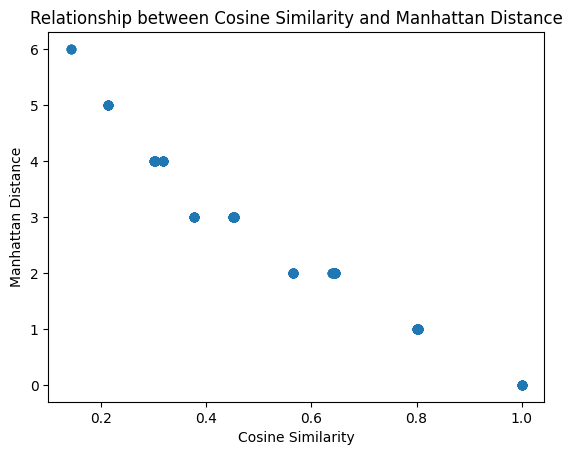

In [ ]:
import numpy as np

k = 4

def householder_matrix(v):
    """Generate a Householder matrix given vector v."""
    size = len(v)
    identity = np.eye(size)
    outer_product = np.outer(v, v)
    return identity - 2 * outer_product / np.dot(v, v)

def generate_location_matrix(k, alpha, p, q):
    matrix = np.zeros((k, k))
    for x in range(1, k+1):
        for y in range(1, k+1):
            matrix[x-1, y-1] = k**2 * alpha**(-abs(p-x) - abs(q-y))
    return matrix

def calculate_distance(matrix1, matrix2):
    A_vec = matrix1.ravel()
    B_vec = matrix2.ravel()
    dot_product = np.dot(A_vec, B_vec)
    norm_A = np.linalg.norm(A_vec)
    norm_B = np.linalg.norm(B_vec)
    return dot_product / (norm_A * norm_B)

def manhattan_distance(p1, p2, q1, q2):
    return abs(p1-p2) + abs(q1-q2)

alpha = 2

# 随机生成一个单位向量
random_vector = np.random.rand(k)
unit_vector = random_vector / np.linalg.norm(random_vector)
# 生成 Householder 变换矩阵
Rt = householder_matrix(unit_vector)

# 为4x4的矩阵生成所有可能的任务和工人的位置
positions = [(i,j) for i in range(1, k+1) for j in range(1, k+1)]

for t_pos in positions:
    for w_pos in positions:
        t_x, t_y = t_pos
        w_x, w_y = w_pos

        Lt = generate_location_matrix(k, alpha, t_x, t_y)
        Lw = generate_location_matrix(k, alpha, w_x, w_y)

        Lt_transformed = Lt @ Rt
        Lw_transformed = Lw @ Rt

        cos_dist = calculate_distance(Lt_transformed, Lw_transformed)
        man_dist = manhattan_distance(t_x, w_x, t_y, w_y)

        print(f"Task {t_pos} and Worker {w_pos}: Cosine Distance = {1-cos_dist}, Manhattan Distance = {man_dist}")
cosine_distances = []
manhattan_distances = []

for t_pos in positions:
    for w_pos in positions:
        t_x, t_y = t_pos
        w_x, w_y = w_pos

        Lt = generate_location_matrix(k, alpha, t_x, t_y)
        Lw = generate_location_matrix(k, alpha, w_x, w_y)

        Lt_transformed = Lt @ Rt
        Lw_transformed = Lw @ Rt

        cos_dist = calculate_distance(Lt_transformed, Lw_transformed)
        man_dist = manhattan_distance(t_x, w_x, t_y, w_y)

        cosine_distances.append(cos_dist)
        manhattan_distances.append(man_dist)

# Plotting
plt.scatter(cosine_distances, manhattan_distances)
plt.xlabel('Cosine Similarity')
plt.ylabel('Manhattan Distance')
plt.title('Relationship between Cosine Similarity and Manhattan Distance')
plt.show()


In [ ]:
import numpy as np
#encrypt the locations of  tasks and workers
np.set_printoptions(linewidth=100)
k = 30
def random_orthogonal_matrix(size):
    random_matrix = np.random.rand(size, size)
    Q, R = np.linalg.qr(random_matrix)
    return Q

def householder_matrix(v):
    """Generate a Householder matrix given vector v."""
    size = len(v)
    identity = np.eye(size)
    outer_product = np.outer(v, v)
    return identity - 2 * outer_product / np.dot(v, v)

def random_householder_matrix(size):
    random_vector = np.random.rand(size)
    unit_vector = random_vector / np.linalg.norm(random_vector)
    return householder_matrix(unit_vector)

def generate_location_matrix(k, alpha, p, q):
    matrix = np.zeros((k, k))
    for x in range(1, k+1):
        for y in range(1, k+1):
            matrix[x-1, y-1] = k**2 * alpha**(-abs(p-x) - abs(q-y))
    return matrix

def calculate_distance(matrix1, matrix2):
    A_vec = matrix1.ravel()
    B_vec = matrix2.ravel()
    dot_product = np.dot(A_vec, B_vec)
    norm_A = np.linalg.norm(A_vec)
    norm_B = np.linalg.norm(B_vec)
    return dot_product / (norm_A * norm_B)

def is_location_exposed(matrix, true_position):
    max_position = np.unravel_index(np.argmax(matrix), matrix.shape)
    min_position = np.unravel_index(np.argmin(matrix), matrix.shape)
    return true_position == max_position or true_position == min_position

def generate_safe_matrices(Lt, t_position, Lws, w_positions):
    attempt = 1
    while True:
        Rt = random_orthogonal_matrix(k)
        Lt_1 = Lt @ Rt
        Rw = Rt
        Lw_transformed = [Lw @ Rw for Lw in Lws]
        if not is_location_exposed(Lt_1, t_position) and not any(is_location_exposed(Lw, pos) for Lw, pos in zip(Lw_transformed, w_positions)):
            return Lt_1, Lw_transformed
        else:
            attempt += 1
alpha = 2
task_positions = [(1, 1), (3, 3), (5, 5)]
worker_positions_list = [(1, 2), (2, 1), (3, 4)]
for t_idx, task_pos in enumerate(task_positions):
    Lt = generate_location_matrix(k, alpha, *task_pos)
    for w_idx, worker_pos in enumerate(worker_positions_list):
        Lw = generate_location_matrix(k, alpha, *worker_pos)
        Lt_1, [Lw_transformed] = generate_safe_matrices(Lt, (task_pos[0]-1, task_pos[1]-1), [Lw], [(worker_pos[0]-1, worker_pos[1]-1)])
        print(f'T{t_idx+1}{"W"}{w_idx+1}:', calculate_distance(Lt_1, Lw_transformed))
    print("*"*50)



T1W1: 0.8029550685469663
T1W2: 0.8029550685469661
T1W3: 0.20472669421604497
**************************************************
T2W1: 0.4501194778473048
T2W2: 0.4501194778473047
T2W3: 0.8000089281673141
**************************************************
T3W1: 0.07892331735969292
T3W2: 0.07892331735969295
T3W3: 0.44043266085932087
**************************************************


In [ ]:
import numpy as np
np.random.seed(6)
#encrypt the bid of workers
def scalar_to_matrix(bid):
    # 产生一个4x4的随机矩阵，值范围在[0, 1)
    matrix = np.random.rand(4, 4).round(3)
    # 根据您的需求调整随机值的范围和偏移，例如乘以10
    matrix *= 10
    # 将对角线上的值设置为标量的1/4
    np.fill_diagonal(matrix, bid/4)
    return matrix

def householder_matrix(v):
    """Generate a Householder matrix given vector v."""
    size = len(v)
    identity = np.eye(size)
    outer_product = np.outer(v, v)
    return identity - 2 * outer_product / np.dot(v, v)
def random_householder_matrix(size):
    random_vector = np.random.rand(size)
    unit_vector = random_vector / np.linalg.norm(random_vector)
    return householder_matrix(unit_vector)

def generate_encryption_matrix():
  return random_householder_matrix(4)
    # while True:
    #     matrix = np.random.rand(4, 4)
    #     if np.linalg.det(matrix) != 0:  # 确保矩阵是可逆的
    #         return matrix
def encrypt(matrix, encryption_matrix):
    return matrix @ encryption_matrix
def decrypt(encrypted_matrix, encryption_matrix):
    #np.linalg.inv(encryption_matrix)
    return encrypted_matrix @ encryption_matrix
    # return encrypted_matrix @ decryption_matrix

bid = 25 #对角线的取值bid/2k,k为矩阵大小。
matrix = scalar_to_matrix(bid)
print("\n原始报价矩阵为:")
print(matrix)

encryption_matrix = generate_encryption_matrix()
print(encryption_matrix)
encrypted_matrix = encrypt(matrix, encryption_matrix)
print("\n加密后的报价矩阵为:")
print(encrypted_matrix)

decrypted_matrix = decrypt(encrypted_matrix, encryption_matrix)
print("\n解密后的报价为:")
print(np.trace(decrypted_matrix))




原始报价矩阵为:
[[6.25 3.32 8.21 0.42]
 [1.08 6.25 5.3  4.19]
 [3.35 6.23 6.25 7.36]
 [5.18 5.79 6.45 6.25]]
[[ 0.41278163 -0.29595262 -0.6276213  -0.59001261]
 [-0.29595262  0.85084262 -0.31631532 -0.29736089]
 [-0.6276213  -0.31631532  0.32919589 -0.63060779]
 [-0.59001261 -0.29736089 -0.63060779  0.40717986]]

加密后的报价矩阵为:
[[-3.8032537  -1.74674672 -2.53495697 -9.68109138]
 [-7.20244544  2.07572424 -3.55231016 -4.13185686]
 [-8.72609231  0.14376137 -6.6569748  -4.77355551]
 [-7.31109304 -0.50539516 -6.90052921 -6.300531  ]]

解密后的报价为:
25.0


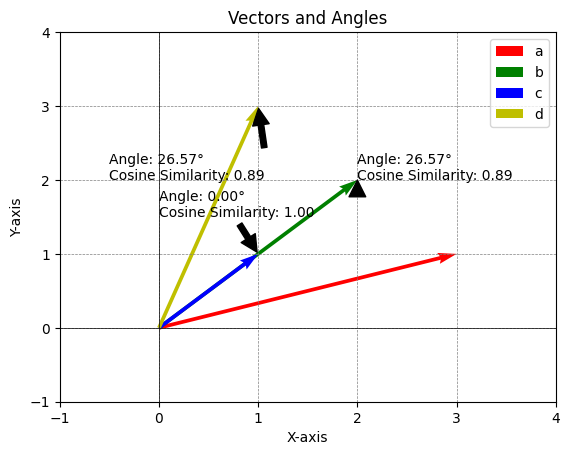

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 定义向量
vectors = {
    'a': np.array([3, 1]),
    'b': np.array([2, 2]),
    'c': np.array([1, 1]),
    'd': np.array([1, 3])
}

# 绘制向量
origin = np.array([0, 0])
plt.quiver(*origin, vectors['a'][0], vectors['a'][1], scale=1, scale_units='xy', angles='xy', color='r', label='a')
plt.quiver(*origin, vectors['b'][0], vectors['b'][1], scale=1, scale_units='xy', angles='xy', color='g', label='b')
plt.quiver(*origin, vectors['c'][0], vectors['c'][1], scale=1, scale_units='xy', angles='xy', color='b', label='c')
plt.quiver(*origin, vectors['d'][0], vectors['d'][1], scale=1, scale_units='xy', angles='xy', color='y', label='d')

# 绘制向量之间的夹角
plt.annotate('Angle: {:.2f}°\nCosine Similarity: {:.2f}'.format(np.degrees(np.arccos(np.dot(vectors['a'], vectors['b']) / (np.linalg.norm(vectors['a']) * np.linalg.norm(vectors['b'])))), np.dot(vectors['a'], vectors['b']) / (np.linalg.norm(vectors['a']) * np.linalg.norm(vectors['b']))),
             xy=(vectors['b'][0], vectors['b'][1]), xytext=(2, 2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Angle: {:.2f}°\nCosine Similarity: {:.2f}'.format(np.degrees(np.arccos(np.dot(vectors['b'], vectors['c']) / (np.linalg.norm(vectors['b']) * np.linalg.norm(vectors['c'])))), np.dot(vectors['b'], vectors['c']) / (np.linalg.norm(vectors['b']) * np.linalg.norm(vectors['c']))),
             xy=(vectors['c'][0], vectors['c'][1]), xytext=(0, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Angle: {:.2f}°\nCosine Similarity: {:.2f}'.format(np.degrees(np.arccos(np.dot(vectors['c'], vectors['d']) / (np.linalg.norm(vectors['c']) * np.linalg.norm(vectors['d'])))), np.dot(vectors['c'], vectors['d']) / (np.linalg.norm(vectors['c']) * np.linalg.norm(vectors['d']))),
             xy=(vectors['d'][0], vectors['d'][1]), xytext=(-0.5, 2),
             arrowprops=dict(facecolor='black', shrink=0.05))

# 设置坐标轴
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Vectors and Angles')

# 显示图例
plt.legend()

# 显示图形
plt.show()


In [ ]:
import numpy as np
import time
#encrypt the locations of  tasks and workers
from scipy.optimize import linear_sum_assignment
import numpy as np
import os


start_time = time.time()
def random_orthogonal_matrix(size,filename='orthogonal_matrix1.npy'):
    # random_matrix = np.random.rand(size, size)
    # Q, R = np.linalg.qr(random_matrix)
    if os.path.exists(filename):
        # 直接从文件中加载矩阵
        Q = np.load(filename)
    else:
        # 生成一个随机矩阵
        random_matrix = np.random.rand(size, size)
        # 使用QR分解得到正交矩阵Q
        Q, _ = np.linalg.qr(random_matrix)
        # 将矩阵保存到文件中
        np.save(filename, Q)
    return Q

def householder_matrix(v):
    """Generate a Householder matrix given vector v."""
    size = len(v)
    identity = np.eye(size)
    outer_product = np.outer(v, v)
    return identity - 2 * outer_product / np.dot(v, v)

def random_householder_matrix(size):
    random_vector = np.random.rand(size)
    unit_vector = random_vector / np.linalg.norm(random_vector)
    return householder_matrix(unit_vector)

def generate_location_matrix(k, alpha, p, q):
    matrix = np.zeros((k, k))
    for x in range(1, k+1):
        for y in range(1, k+1):
            matrix[x-1, y-1] = k**2 * alpha**(-abs(p-x) - abs(q-y))
    return matrix

def calculate_distance(matrix1, matrix2):
    A_vec = matrix1.ravel()
    B_vec = matrix2.ravel()
    dot_product = np.dot(A_vec, B_vec)
    norm_A = np.linalg.norm(A_vec)
    norm_B = np.linalg.norm(B_vec)
    return dot_product / (norm_A * norm_B)


def rank_values(arr):
    # 获取数组中唯一值的排序后版本
    unique_values = np.unique(arr)

    # 使用 searchsorted 方法查找原数组中每个元素在唯一值数组中的索引
    # 这将为原数组中的每个元素分配一个基于其值的排名
    ranked = np.searchsorted(unique_values, arr)

    return ranked
def generate_safe_matrices(Lt, t_position, Lws, w_positions):
        Rt = random_orthogonal_matrix(grid_size)
        Lt_1 = Lt @ Rt
        Rw = Rt
        Lw_transformed = [Lw @ Rw for Lw in Lws]
        return Lt_1, Lw_transformed

alpha = 2

# 构建代价矩阵
cost_matrix = np.zeros((len(tasks), len(workers)))
tasks_list = list(tasks.items())
workers_list = list(workers.items())

for i, (t_id, task_pos) in enumerate(tasks_list):
    Lt = generate_location_matrix(grid_size, alpha, *task_pos)
    for j, (w_id, worker_pos) in enumerate(workers_list):
        Lw = generate_location_matrix(grid_size, alpha, *worker_pos)
        Lt_1, [Lw_transformed] = generate_safe_matrices(Lt, (task_pos[0]-1, task_pos[1]-1), [Lw], [(worker_pos[0]-1, worker_pos[1]-1)])
        similarity = calculate_distance(Lt_1, Lw_transformed)
        cost_matrix[i, j] = (1 / similarity)  # 用1减去相似度得到成本

cost_matrix2 = rank_values(cost_matrix)
# 使用匈牙利算法
row_ind, col_ind = linear_sum_assignment(cost_matrix2)


end_time = time.time()
execution_time_ms = (end_time - start_time) * 1000
print(f"Execution time: {execution_time_ms} milliseconds")

Execution time: 11720.362901687622 milliseconds
